[Data](https://www.kaggle.com/competitions/titanic/data?select=train.csv)

In [777]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [778]:
titanic=pd.read_csv("/content/drive/MyDrive/GTC_Internship/titanic/Titanic-Dataset.csv")

#Data exploration

In [779]:
pd.set_option('display.max_columns', None)

In [780]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [781]:
titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [782]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [783]:
titanic.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


#Data Cleaning

- lower all object columns data type to get more accurate result in duplicates

In [784]:
for col in titanic.select_dtypes(include=['object']).columns:
    titanic[col] = titanic[col].str.lower().str.strip()

In [785]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"braund, mr. owen harris",male,22.0,1,0,a/5 21171,7.2500,NaN,s
1,2,1,1,"cumings, mrs. john bradley (florence briggs th...",female,38.0,1,0,pc 17599,71.2833,c85,c
2,3,1,3,"heikkinen, miss. laina",female,26.0,0,0,ston/o2. 3101282,7.9250,NaN,s
3,4,1,1,"futrelle, mrs. jacques heath (lily may peel)",female,35.0,1,0,113803,53.1000,c123,s
4,5,0,3,"allen, mr. william henry",male,35.0,0,0,373450,8.0500,NaN,s


In [786]:
titanic[['Survived','Pclass','Sex','Embarked']]=titanic[['Survived','Pclass','Sex','Embarked']].astype('category')

In [787]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    category
dtypes: category(4), float64(2), int64(3), object(3)
memory usage: 59.8+ KB


- ensure data ranges is true

In [788]:
assert titanic['Survived'].isin([0,1]).any()
assert titanic['Pclass'].isin([1,2,3]).any()
assert titanic['Sex'].isin(['male','female']).any()
assert titanic['Embarked'].isin(['s','c','q']).any()

- nulls manipulation

In [789]:
x=titanic.isnull().sum()
print(x,(x/titanic.shape[0])*100)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64 PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


- 77% percent of nulls is a high value and it may affect the model and our analysis so the safe choice is drop it

In [790]:
cabin_col=titanic['Cabin']
titanic=titanic.drop(columns=['Cabin'])
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    category
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Embarked     889 non-null    category
dtypes: category(4), float64(2), int64(3), object(2)
memory usage: 52.8+ KB


- check the class ,the embarked nulls in it

In [791]:
titanic.loc[titanic['Embarked'].isnull()==True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1,1,"icard, miss. amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1,1,"stone, mrs. george nelson (martha evelyn)",female,62.0,0,0,113572,80.0,NaN


In [792]:
titanic_embarked_class_1=titanic.loc[titanic['Pclass']==1]

In [793]:
titanic_embarked_class_1['Pclass'].unique()

[1]
Categories (3, int64): [1, 2, 3]

In [794]:
titanic_embarked_class_1['Embarked'].describe()

,Embarked
count,214
unique,3
top,s
freq,127


- fill nulls with most populular embarked in this class

In [795]:
old_Embarked=titanic['Embarked']
titanic['Embarked']=titanic['Embarked'].fillna(titanic_embarked_class_1['Embarked'].mode()[0])

In [796]:
titanic.loc[titanic['Embarked'].isnull()==True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


- titanic has a variety of ages in it so,my decision here is to fill nulls with median

In [797]:
old_age=titanic['Age']
titanic['Age']=titanic['Age'].fillna(titanic['Age'].median())

In [798]:
titanic.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


- drop passenger_id

In [799]:
titanic.drop(columns=['PassengerId'],inplace=True)

In [800]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    category
 1   Pclass    891 non-null    category
 2   Name      891 non-null    object  
 3   Sex       891 non-null    category
 4   Age       891 non-null    float64 
 5   SibSp     891 non-null    int64   
 6   Parch     891 non-null    int64   
 7   Ticket    891 non-null    object  
 8   Fare      891 non-null    float64 
 9   Embarked  891 non-null    category
dtypes: category(4), float64(2), int64(2), object(2)
memory usage: 45.9+ KB


In [801]:
titanic.describe(include='all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,891.0,891.0,891,891,891.000000,891.000000,891.000000,891,891.000000,891
unique,2.0,3.0,891,2,NaN,NaN,NaN,681,NaN,3
top,0.0,3.0,"dooley, mr. patrick",male,NaN,NaN,NaN,347082,NaN,s
freq,549.0,491.0,1,577,NaN,NaN,NaN,7,NaN,646
mean,NaN,NaN,NaN,NaN,29.361582,0.523008,0.381594,NaN,32.204208,NaN
std,NaN,NaN,NaN,NaN,13.019697,1.102743,0.806057,NaN,49.693429,NaN
min,NaN,NaN,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN
25%,NaN,NaN,NaN,NaN,22.000000,0.000000,0.000000,NaN,7.910400,NaN
50%,NaN,NaN,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN
75%,NaN,NaN,NaN,NaN,35.000000,1.000000,0.000000,NaN,31.000000,NaN


- check for duplicate values

In [802]:
duplicated=titanic.duplicated()
titanic[duplicated]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


there are 681 unique values in ticket column which mean there are duplicates in it

In [803]:
duplicated_ticket=titanic.duplicated(subset=['Ticket'],keep=False)
titanic[duplicated_ticket].sort_values(by=['Ticket'])

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
257,1,1,"cherry, miss. gladys",female,30.0,0,0,110152,86.500,s
759,1,1,"rothes, the countess. of (lucy noel martha dye...",female,33.0,0,0,110152,86.500,s
504,1,1,"maioni, miss. roberta",female,16.0,0,0,110152,86.500,s
262,0,1,"taussig, mr. emil",male,52.0,1,1,110413,79.650,s
558,1,1,"taussig, mrs. emil (tillie mandelbaum)",female,39.0,1,1,110413,79.650,s
...,...,...,...,...,...,...,...,...,...,...
736,0,3,"ford, mrs. edward (margaret ann watson)",female,48.0,1,3,w./c. 6608,34.375,s
86,0,3,"ford, mr. william neal",male,16.0,1,3,w./c. 6608,34.375,s
147,0,3,"ford, miss. robina maggie ""ruby""",female,9.0,2,2,w./c. 6608,34.375,s
540,1,1,"crosby, miss. harriet r",female,36.0,0,2,we/p 5735,71.000,s


In [804]:
titanic[titanic['Ticket']=='110152']

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
257,1,1,"cherry, miss. gladys",female,30.0,0,0,110152,86.5,s
504,1,1,"maioni, miss. roberta",female,16.0,0,0,110152,86.5,s
759,1,1,"rothes, the countess. of (lucy noel martha dye...",female,33.0,0,0,110152,86.5,s


- When passengers are with the same ticket number mean they are group of friends or family , get pattern is so hard so I will drop ticket column and get no of family and explored the relation between family members and survived or not in EDA section

In [805]:
titanic['No_of_Family_Members']=titanic['Parch']+titanic['SibSp']

In [806]:
titanic[['SibSp','Parch','No_of_Family_Members']]=titanic[['SibSp','Parch','No_of_Family_Members']].astype('category')

In [807]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Survived              891 non-null    category
 1   Pclass                891 non-null    category
 2   Name                  891 non-null    object  
 3   Sex                   891 non-null    category
 4   Age                   891 non-null    float64 
 5   SibSp                 891 non-null    category
 6   Parch                 891 non-null    category
 7   Ticket                891 non-null    object  
 8   Fare                  891 non-null    float64 
 9   Embarked              891 non-null    category
 10  No_of_Family_Members  891 non-null    category
dtypes: category(7), float64(2), object(2)
memory usage: 35.6+ KB


In [808]:
titanic.describe(include='all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,No_of_Family_Members
count,891.0,891.0,891,891,891.000000,891.0,891.0,891,891.000000,891,891.0
unique,2.0,3.0,891,2,NaN,7.0,7.0,681,NaN,3,9.0
top,0.0,3.0,"dooley, mr. patrick",male,NaN,0.0,0.0,347082,NaN,s,0.0
freq,549.0,491.0,1,577,NaN,608.0,678.0,7,NaN,646,537.0
mean,NaN,NaN,NaN,NaN,29.361582,NaN,NaN,NaN,32.204208,NaN,NaN
std,NaN,NaN,NaN,NaN,13.019697,NaN,NaN,NaN,49.693429,NaN,NaN
min,NaN,NaN,NaN,NaN,0.420000,NaN,NaN,NaN,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,22.000000,NaN,NaN,NaN,7.910400,NaN,NaN
50%,NaN,NaN,NaN,NaN,28.000000,NaN,NaN,NaN,14.454200,NaN,NaN
75%,NaN,NaN,NaN,NaN,35.000000,NaN,NaN,NaN,31.000000,NaN,NaN


- check the values in SibSp - Parch columns

In [809]:
titanic['SibSp'].unique()

[1, 0, 3, 4, 2, 5, 8]
Categories (7, int64): [0, 1, 2, 3, 4, 5, 8]

In [810]:
titanic['Parch'].unique()

[0, 1, 2, 5, 3, 4, 6]
Categories (7, int64): [0, 1, 2, 3, 4, 5, 6]

In [811]:
titanic.shape

(891, 11)

In [812]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Survived              891 non-null    category
 1   Pclass                891 non-null    category
 2   Name                  891 non-null    object  
 3   Sex                   891 non-null    category
 4   Age                   891 non-null    float64 
 5   SibSp                 891 non-null    category
 6   Parch                 891 non-null    category
 7   Ticket                891 non-null    object  
 8   Fare                  891 non-null    float64 
 9   Embarked              891 non-null    category
 10  No_of_Family_Members  891 non-null    category
dtypes: category(7), float64(2), object(2)
memory usage: 35.6+ KB


In [813]:
# drop ticket and name after EDA in case we need it

# EDA

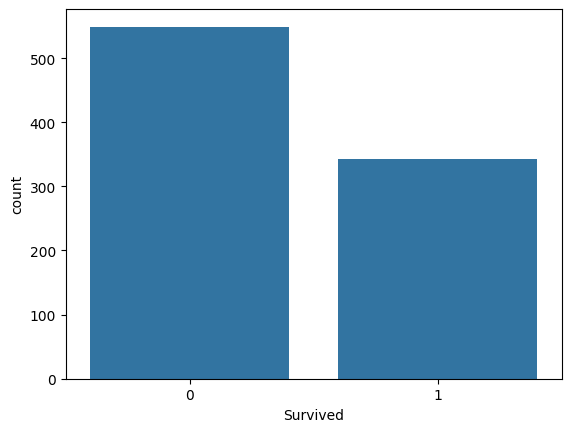

In [814]:
# how may people survivied or not?
plt.figure()
sns.countplot(data=titanic , x='Survived')
plt.show()

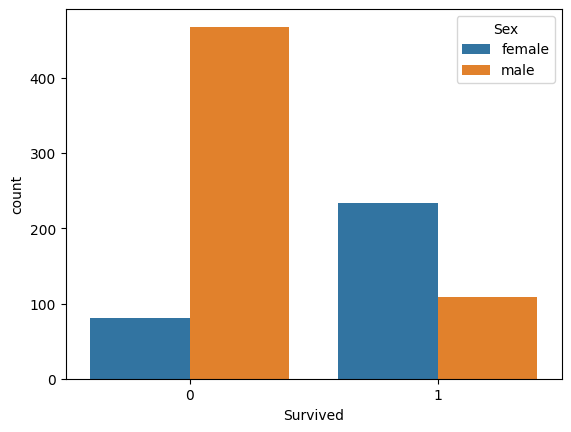

In [815]:
#- how many men's or woman's survived or not
plt.figure()
sns.countplot(data=titanic , x='Survived',hue='Sex')
plt.show()

In [816]:
titanic['Survived'].value_counts()/titanic.shape[0]

,count
Survived,
0,0.616162
1,0.383838


- data is slightly imbalance

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Fare'}>]], dtype=object)

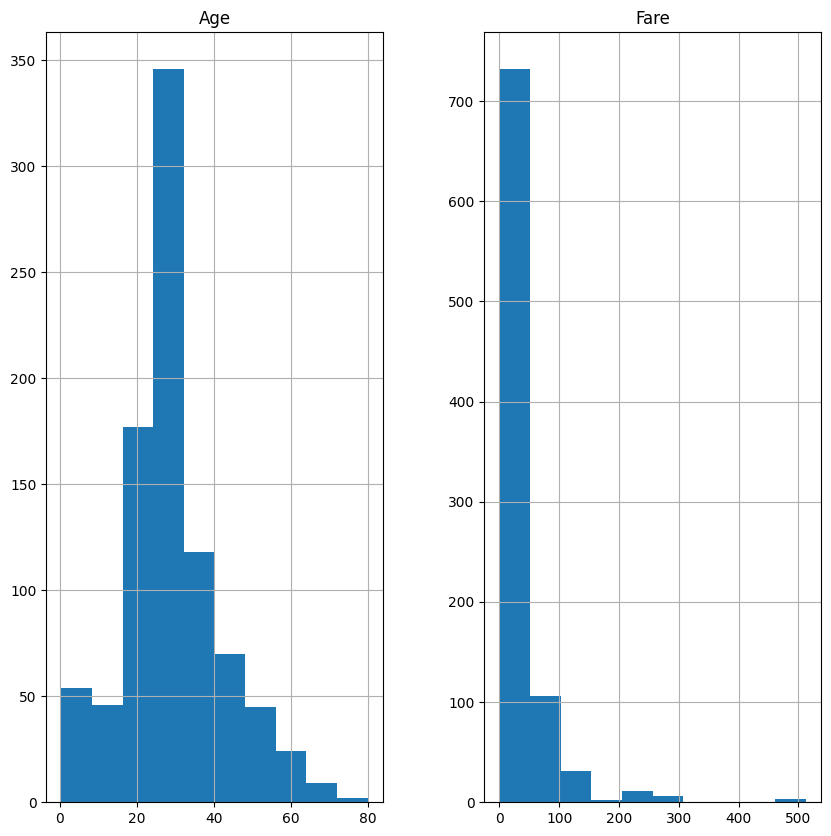

In [817]:
#- Check the distibution for numerical columns
titanic.hist(figsize=(10,10))

In [818]:
titanic_dis_fix=titanic.copy()

In [819]:
titanic_dis_fix['Fare']=np.log(titanic_dis_fix['Fare']+1)

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Fare'}>]], dtype=object)

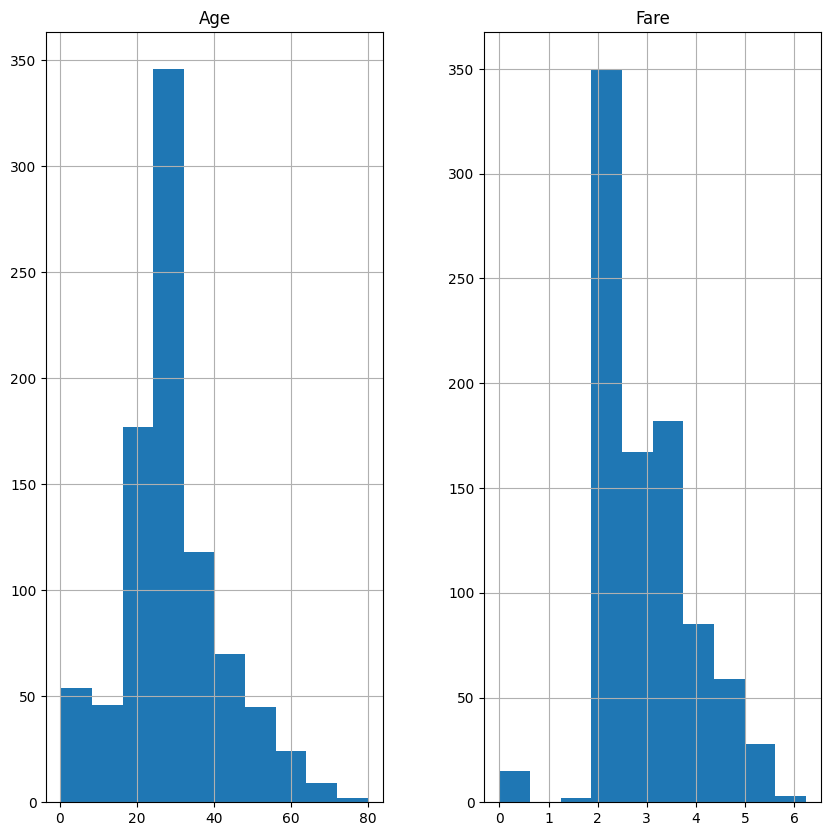

In [820]:
titanic_dis_fix.hist(figsize=(10,10))

In [821]:
titanic[titanic['Fare']==0]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,No_of_Family_Members
179,0,3,"leonard, mr. lionel",male,36.0,0,0,line,0.0,s,0
263,0,1,"harrison, mr. william",male,40.0,0,0,112059,0.0,s,0
271,1,3,"tornquist, mr. william henry",male,25.0,0,0,line,0.0,s,0
277,0,2,"parkes, mr. francis ""frank""",male,28.0,0,0,239853,0.0,s,0
302,0,3,"johnson, mr. william cahoone jr",male,19.0,0,0,line,0.0,s,0
413,0,2,"cunningham, mr. alfred fleming",male,28.0,0,0,239853,0.0,s,0
466,0,2,"campbell, mr. william",male,28.0,0,0,239853,0.0,s,0
481,0,2,"frost, mr. anthony wood ""archie""",male,28.0,0,0,239854,0.0,s,0
597,0,3,"johnson, mr. alfred",male,49.0,0,0,line,0.0,s,0
633,0,1,"parr, mr. william henry marsh",male,28.0,0,0,112052,0.0,s,0


- This patten is alittle bit confused because they have ticket but do not pay fare , But I will keep it , because it gives me a pattern of people who went alone, maybe they snuck in or were invited for nothing, but the result was drowning.

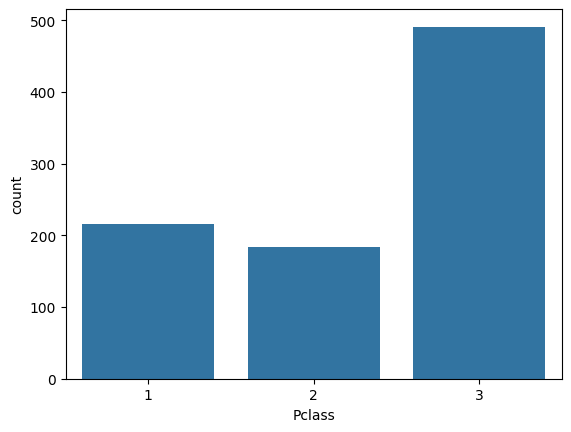

In [822]:
# How many passengers in each class?
plt.figure()
sns.countplot(data=titanic , x='Pclass')
plt.show()

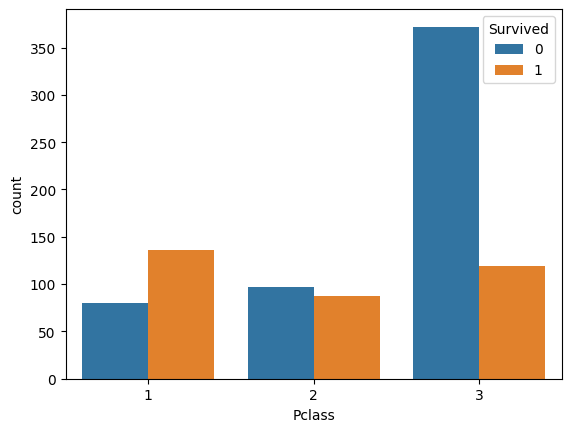

In [823]:
# How many passengers in each class and which class for most survived people?
plt.figure()
sns.countplot(data=titanic , x='Pclass',hue='Survived')
plt.show()

- Most survived people in class 1

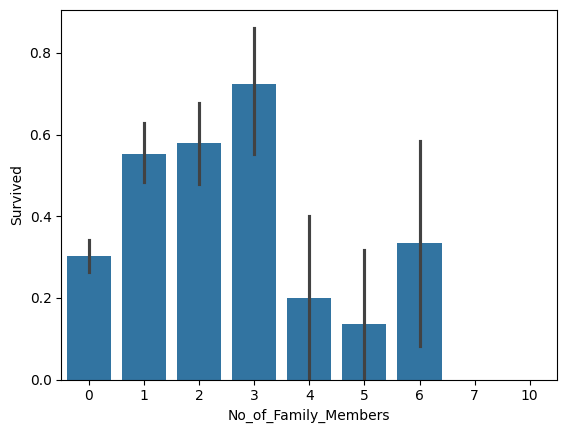

In [824]:
# Are passengers with larger family members survived more than passengers with less number of family members?
plt.figure()
sns.barplot(x='No_of_Family_Members', y='Survived', data=titanic)
plt.gca().invert_yaxis()
plt.show()

- Passengers with Moderate family members have a better chance to survived

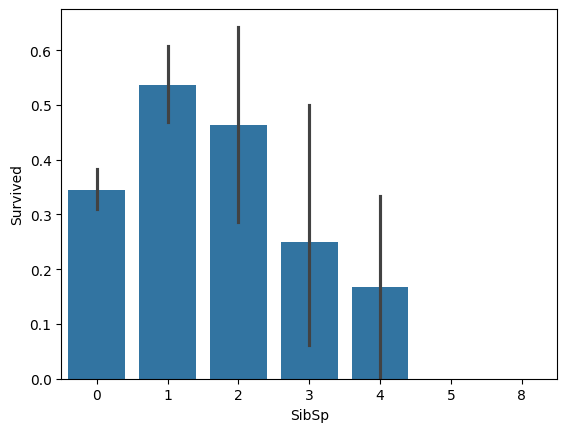

In [825]:
# Are passengers has large no of siblings are survived more than passengers with lower no of siblings?
plt.figure()
sns.barplot(x='SibSp', y='Survived', data=titanic)
plt.gca().invert_yaxis()
plt.show()

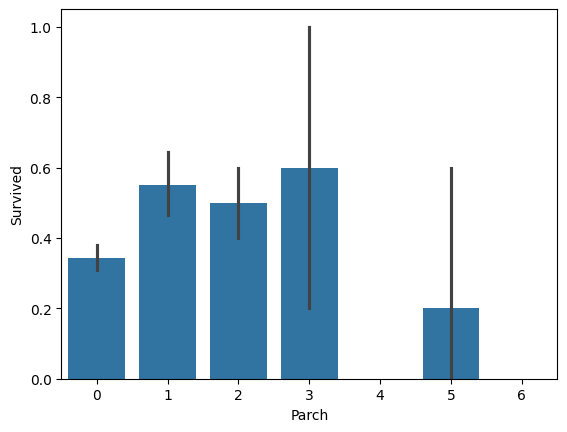

In [826]:
# Are passengers has large no of childs are survived more than passengers with lower no of childs?
plt.figure()
sns.barplot(x='Parch', y='Survived', data=titanic)
plt.gca().invert_yaxis()
plt.show()

- chance of survive is higher when the numbers are more moderate

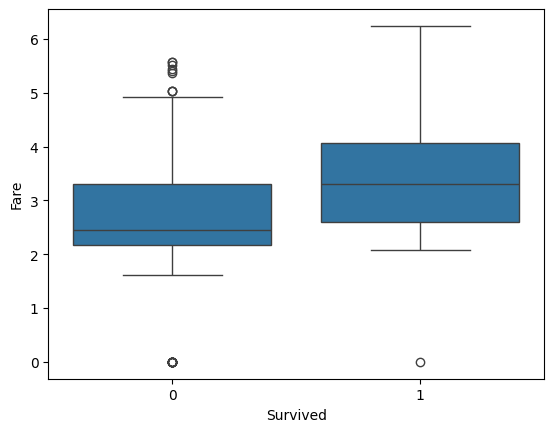

In [827]:
# Fare distribution based on survival status?
plt.figure()
sns.boxplot(x='Survived', y='Fare', data=titanic_dis_fix)
plt.show()

- no outliers in Fare

# Feature Engineering

In [828]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Survived              891 non-null    category
 1   Pclass                891 non-null    category
 2   Name                  891 non-null    object  
 3   Sex                   891 non-null    category
 4   Age                   891 non-null    float64 
 5   SibSp                 891 non-null    category
 6   Parch                 891 non-null    category
 7   Ticket                891 non-null    object  
 8   Fare                  891 non-null    float64 
 9   Embarked              891 non-null    category
 10  No_of_Family_Members  891 non-null    category
dtypes: category(7), float64(2), object(2)
memory usage: 35.6+ KB


In [829]:
# Drop name and Ticket columns

In [830]:
titanic_dis_fix.drop(columns=['Ticket','Name'],inplace=True)

In [831]:
titanic_dis_fix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Survived              891 non-null    category
 1   Pclass                891 non-null    category
 2   Sex                   891 non-null    category
 3   Age                   891 non-null    float64 
 4   SibSp                 891 non-null    category
 5   Parch                 891 non-null    category
 6   Fare                  891 non-null    float64 
 7   Embarked              891 non-null    category
 8   No_of_Family_Members  891 non-null    category
dtypes: category(7), float64(2)
memory usage: 21.7 KB


In [832]:
x=titanic_dis_fix.drop(columns=['Survived'])
y=titanic_dis_fix['Survived']

In [833]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Pclass                891 non-null    category
 1   Sex                   891 non-null    category
 2   Age                   891 non-null    float64 
 3   SibSp                 891 non-null    category
 4   Parch                 891 non-null    category
 5   Fare                  891 non-null    float64 
 6   Embarked              891 non-null    category
 7   No_of_Family_Members  891 non-null    category
dtypes: category(6), float64(2)
memory usage: 20.7 KB


In [834]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Survived
Non-Null Count  Dtype   
--------------  -----   
891 non-null    category
dtypes: category(1)
memory usage: 1.1 KB


In [835]:
# goal feature is Survived Feature
# It is a categorical Feature So I will choose Anova or Kendalis for numerical - catgorical -> input - output
# And choose chi2 for categorical - categorical -> input - output

In [836]:
x_numeric=x[['Age','Fare']]
x_numeric.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Age     891 non-null    float64
 1   Fare    891 non-null    float64
dtypes: float64(2)
memory usage: 14.1 KB


In [837]:
# There are just 2 columns numerical and I am sure they are related but to be more confidence I will try anova
from sklearn.feature_selection import f_classif
f_values,p_values=f_classif(x_numeric,y)
for i , col in enumerate(x_numeric):
  print(f'col: {col} , f_value: {f_values[i]} , p_value: {p_values[i]}')

col: Age , f_value: 3.7615280468809664 , p_value: 0.05276068847582179
col: Fare , f_value: 108.54151903409662 , p_value: 4.6466702861568034e-24


- Based on what I get Age p_value >=0.05 which mean I refused The null hypothesis and it has a low effect on survived feature , so I will drop it

In [838]:
old_x=x.copy()

In [839]:
x.drop(columns=['Age'],inplace=True)
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Pclass                891 non-null    category
 1   Sex                   891 non-null    category
 2   SibSp                 891 non-null    category
 3   Parch                 891 non-null    category
 4   Fare                  891 non-null    float64 
 5   Embarked              891 non-null    category
 6   No_of_Family_Members  891 non-null    category
dtypes: category(6), float64(1)
memory usage: 13.7 KB


In [840]:
# Chi2 test for categorical
# First I should label these data

# p_class column order is importent so I will choose label encoding
from pandas.api.types import CategoricalDtype
cat_type=CategoricalDtype(categories=[1,2,3],ordered=True)
x['Pclass']=x['Pclass'].astype(cat_type)

In [841]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
x['Pclass']=encoder.fit_transform(x['Pclass'])

In [842]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Pclass                891 non-null    int64   
 1   Sex                   891 non-null    category
 2   SibSp                 891 non-null    category
 3   Parch                 891 non-null    category
 4   Fare                  891 non-null    float64 
 5   Embarked              891 non-null    category
 6   No_of_Family_Members  891 non-null    category
dtypes: category(5), float64(1), int64(1)
memory usage: 19.7 KB


In [843]:
# for SibSp , Parch and No_of_Family_Members , I will choose Label Encoding also because in EDA
# we found if the family has more moderate numbers it will has more chances to survive
# from EDA family range 0->10
# SibSp range 0 -> 8
# Parch range 0>6

family_range=np.arange(0,11)
SibSp_range=np.arange(0,9)
Parch_range=np.arange(0,6)

family_type=CategoricalDtype(categories=family_range,ordered=True)
SibSp_type=CategoricalDtype(categories=SibSp_range,ordered=True)
Parch_type=CategoricalDtype(categories=Parch_range,ordered=True)

In [844]:
columns=['SibSp','Parch','No_of_Family_Members']
for col in columns:
  x[col]=encoder.fit_transform(x[col])

In [845]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Pclass                891 non-null    int64   
 1   Sex                   891 non-null    category
 2   SibSp                 891 non-null    int64   
 3   Parch                 891 non-null    int64   
 4   Fare                  891 non-null    float64 
 5   Embarked              891 non-null    category
 6   No_of_Family_Members  891 non-null    int64   
dtypes: category(2), float64(1), int64(4)
memory usage: 36.9 KB


In [846]:
# I will use label encoder with embarked and sex without specific oreder
# But I want to make one hot encding in modeling so I will make another version of x called x_chi2_score
# to use it in test
x_chi2_score=x.copy()
x_chi2_score['Sex']=encoder.fit_transform(x_chi2_score['Sex'])
x_chi2_score['Embarked']=encoder.fit_transform(x_chi2_score['Embarked'])

In [847]:
x_chi2_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Pclass                891 non-null    int64  
 1   Sex                   891 non-null    int64  
 2   SibSp                 891 non-null    int64  
 3   Parch                 891 non-null    int64  
 4   Fare                  891 non-null    float64
 5   Embarked              891 non-null    int64  
 6   No_of_Family_Members  891 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 48.9 KB


In [848]:
# For sex and Embarked I will use OneHotEncoder with drop first
x=x.join(pd.get_dummies(x[['Sex','Embarked']],drop_first=True)).drop(columns=['Sex','Embarked'])
x

,Pclass,SibSp,Parch,Fare,No_of_Family_Members,Sex_male,Embarked_q,Embarked_s
0,2,1,0,2.110213,1,True,False,True
1,0,1,0,4.280593,1,False,False,False
2,2,0,0,2.188856,0,False,False,True
3,0,1,0,3.990834,1,False,False,True
4,2,0,0,2.202765,0,True,False,True
...,...,...,...,...,...,...,...,...
886,1,0,0,2.639057,0,True,False,True
887,0,0,0,3.433987,0,False,False,True
888,2,1,2,3.196630,3,False,False,True
889,0,0,0,3.433987,0,True,False,False


In [849]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Pclass                891 non-null    int64  
 1   SibSp                 891 non-null    int64  
 2   Parch                 891 non-null    int64  
 3   Fare                  891 non-null    float64
 4   No_of_Family_Members  891 non-null    int64  
 5   Sex_male              891 non-null    bool   
 6   Embarked_q            891 non-null    bool   
 7   Embarked_s            891 non-null    bool   
dtypes: bool(3), float64(1), int64(4)
memory usage: 37.5 KB


In [850]:
# chi2
from sklearn.feature_selection import chi2
for col in x_chi2_score.select_dtypes(include='int'):
  chi2_score,p_value=chi2(np.array(x_chi2_score[col]).reshape(-1,1),y)
  print(f"Feature: {col} , score: {chi2_score} , p_value: {p_value}")

Feature: Pclass , score: [54.46586599] , p_value: [1.58171493e-13]
Feature: Sex , score: [92.70244698] , p_value: [6.07783826e-22]
Feature: SibSp , score: [1.23604038] , p_value: [0.26623554]
Feature: Parch , score: [10.09749911] , p_value: [0.00148471]
Feature: Embarked , score: [10.20252466] , p_value: [0.00140249]
Feature: No_of_Family_Members , score: [1.54287101] , p_value: [0.21419097]


- siblings and No of family memebers with p_value >0.05 so i will drop it

In [851]:
x.drop(columns=['SibSp','No_of_Family_Members'],inplace=True)

In [852]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   Parch       891 non-null    int64  
 2   Fare        891 non-null    float64
 3   Sex_male    891 non-null    bool   
 4   Embarked_q  891 non-null    bool   
 5   Embarked_s  891 non-null    bool   
dtypes: bool(3), float64(1), int64(2)
memory usage: 23.6 KB


# Modeling

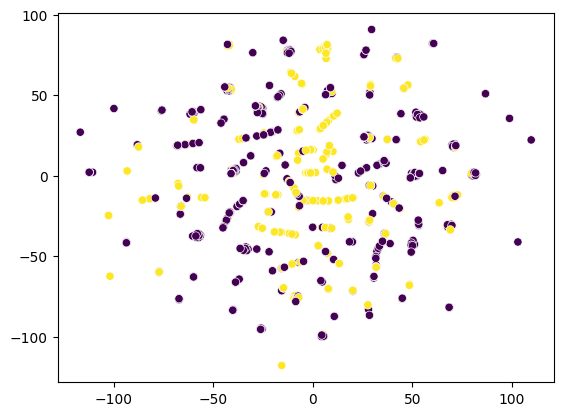

In [853]:
# I will use SVM because data is small and SVM good for small data
# let's use tsne to visulaize data and use right keranl
from sklearn.manifold import TSNE
x_tsne = TSNE(n_components=2, learning_rate='auto',
                  init='random',random_state=42, perplexity=3).fit_transform(x)
sns.scatterplot(x=x_tsne[:,0] , y=x_tsne[:,1] , c=y)
plt.show()

In [854]:
x_before_scaling=x.copy()

In [855]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x['Fare']=scaler.fit_transform(x[['Fare']])
x.head()

,Pclass,Parch,Fare,Sex_male,Embarked_q,Embarked_s
0,2,0,-0.879741,True,False,True
1,0,0,1.361220,False,False,False
2,2,0,-0.798540,False,False,True
3,0,0,1.062038,False,False,True
4,2,0,-0.784179,True,False,True


In [856]:
# prepare data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,shuffle=True)

In [857]:
from sklearn.svm import SVC
svm=SVC(kernel='rbf',C=10,gamma='scale')

In [858]:
svm.fit(x_train,y_train)
svm_predict=svm.predict(x_test)

Accuracy: 0.7932960893854749


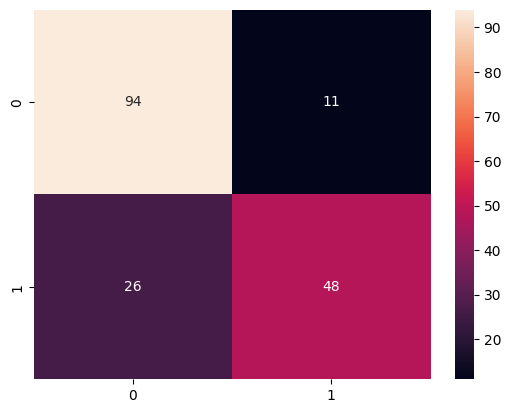

In [859]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy=accuracy_score(y_test,svm_predict)
print(f"Accuracy: {accuracy}")
cm=confusion_matrix(y_test,svm_predict)
sns.heatmap(cm,annot=True)
plt.show()

In [860]:
print(classification_report(y_test,svm_predict))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       105
           1       0.81      0.65      0.72        74

    accuracy                           0.79       179
   macro avg       0.80      0.77      0.78       179
weighted avg       0.80      0.79      0.79       179



## SMOTE

In [861]:
print(x.shape)
print(y.shape)

(891, 6)
(891,)


In [862]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='minority')
x_sm , y_sm = smote.fit_resample(x,y)

In [863]:
print(x_sm.shape)
print(y_sm.shape)

(1098, 6)
(1098,)


In [864]:
x_train,x_test,y_train,y_test=train_test_split(x_sm,y_sm,test_size=0.2,random_state=42,shuffle=True)

Accuracy: 0.8272727272727273


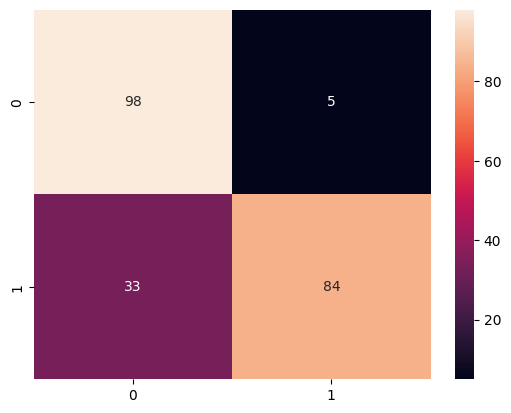

In [865]:
svm_sm=SVC(kernel='rbf',C=10,gamma='scale')
svm_sm.fit(x_train,y_train)
svm_sm_predict=svm.predict(x_test)
accuracy=accuracy_score(y_test,svm_sm_predict)
print(f"Accuracy: {accuracy}")
cm=confusion_matrix(y_test,svm_sm_predict)
sns.heatmap(cm,annot=True)
plt.show()

In [866]:
print(classification_report(y_test,svm_sm_predict))

              precision    recall  f1-score   support

           0       0.75      0.95      0.84       103
           1       0.94      0.72      0.82       117

    accuracy                           0.83       220
   macro avg       0.85      0.83      0.83       220
weighted avg       0.85      0.83      0.83       220



## SMOTE-ENN

In [867]:
print(x.shape)
print(y.shape)

(891, 6)
(891,)


In [868]:
from imblearn.combine import SMOTEENN
sm=SMOTEENN(random_state=42)
x_stome,y_stome=sm.fit_resample(x,y)
print(x_stome.shape)
print(y_stome.shape)

(622, 6)
(622,)


In [869]:
x_train,x_test,y_train,y_test=train_test_split(x_stome,y_stome,test_size=0.2,random_state=42,shuffle=True)

Accuracy: 0.92


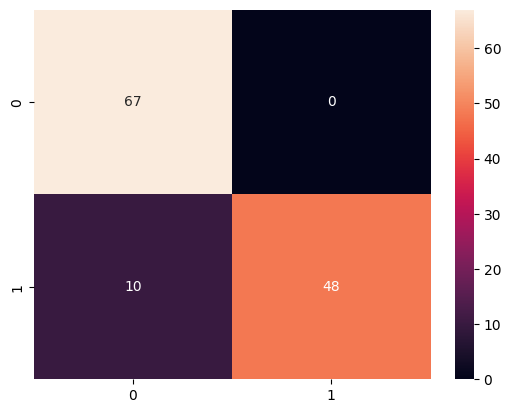

In [870]:
svm_sm_enn=SVC(kernel='rbf',C=10,gamma='scale')
svm_sm_enn.fit(x_train,y_train)
svm_sm_enn_predict=svm.predict(x_test)
accuracy=accuracy_score(y_test,svm_sm_enn_predict)
print(f"Accuracy: {accuracy}")
cm=confusion_matrix(y_test,svm_sm_enn_predict)
sns.heatmap(cm,annot=True)
plt.show()

In [871]:
print(classification_report(y_test,svm_sm_enn_predict))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93        67
           1       1.00      0.83      0.91        58

    accuracy                           0.92       125
   macro avg       0.94      0.91      0.92       125
weighted avg       0.93      0.92      0.92       125



# Final Model

In [872]:
import joblib
joblib.dump(svm_sm_enn,'final_model.pkl')

['final_model.pkl']

In [873]:
# try model
x.head()

,Pclass,Parch,Fare,Sex_male,Embarked_q,Embarked_s
0,2,0,-0.879741,True,False,True
1,0,0,1.361220,False,False,False
2,2,0,-0.798540,False,False,True
3,0,0,1.062038,False,False,True
4,2,0,-0.784179,True,False,True


In [875]:
test_df=pd.DataFrame([
    {
        'Pclass':3,
        'Parch':6,
        'Fare':-0.5,
        'Sex_male':True,
        'Embarked_q':False,
        'Embarked_s':False

    }
])

model=joblib.load('/content/final_model.pkl')
prediction=model.predict(test_df)
print(prediction)

[0]
